<a href="https://colab.research.google.com/github/jbocane6/colab/blob/master/actividad4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Actividad 4 - Práctica, visualización y Python

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importamos las librerias necesarias:

pandas como herramienta de manipulación de los datos almacenados en el dataset.

matplotlib, biblioteca para la generación de gráficos en dos dimensiones.

seaborn, biblioteca para crear gráficos estadísticos en Python.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Cargamos el dataset descargado y organizado, utilizamos varios tipos de encoding para no generar error en la lectura de los datos:

In [ ]:
encodings = ['utf-8', 'latin-1', 'utf-16', 'utf-32']
for encoding in encodings:
    try:
        data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Popular_Spotify_Songs.csv', encoding=encoding, sep=';')
        break
    except UnicodeDecodeError:
        pass

Organizamos los datos con base en una columna específica, en este caso vamos a usar el año de lanzamiento del sencillo:

In [ ]:
data_sorted = data.sort_values(by='released_year')

Obtenemos los nombres de las columnas:

In [ ]:
column_names = data_sorted.columns

## 1. Porcentaje de canciones lanzadas por año

### Matplotlib
Creamos el primer gráfico con matplotlib, este será un gráfico de torta donde mostrará el porcentaje de canciones lanzadas por año con respecto al total de los datos compartidos:

data_sorted['released_year'].apply crea una nueva columna que agrupa los valores iguales o menores a 2015, de lo contrario deja el año correspendiente.

year_counts_grouped cuenta por valor la cantidad de referencias que hay.

plt.pie() crea el gráfico de torta, la variable patches contiene las porciones del gráfico de torta, y el guión bajo _ se encargará de evitar el  uso obligatorio del restante de parámetros que devuelve plt.pie(). values_grouped contiene los valores de las porciones del gráfico de torta.

legend_labels mostrará las etiquetas con la información de cada porción de la torta.

plt.legend y plt.title muestra las leyendas y título de la gráfica.

plt.axis('equal') asegura que la gráfica sea circular.

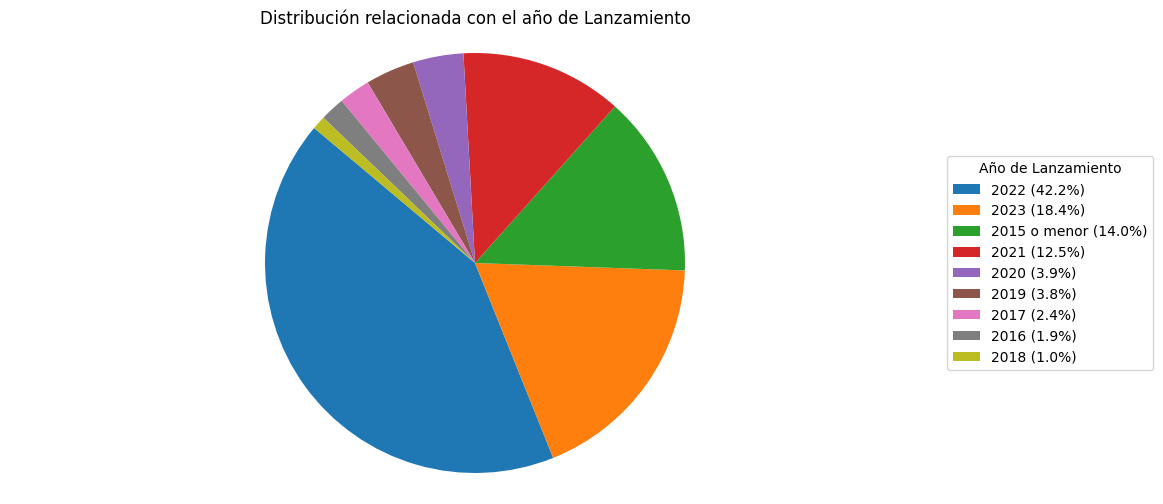

In [ ]:
plt.figure(figsize=(12, 6))

data_sorted['grouped_year'] = data_sorted['released_year'].apply(lambda x: x if x > 2015 else '2015 o menor')

year_counts_grouped = data_sorted['grouped_year'].value_counts()
values_grouped = year_counts_grouped.values
labels_grouped = year_counts_grouped.index.astype(str)

patches, _ = plt.pie(values_grouped, startangle=140)

legend_labels = [f'{label} ({percentage:.1f}%)' for label, percentage in zip(labels_grouped, values_grouped / sum(values_grouped) * 100)]

plt.legend(handles=patches, labels=legend_labels, loc='center left', bbox_to_anchor=(1, 0.5), title='Año de Lanzamiento')

plt.title('Distribución relacionada con el año de Lanzamiento')
plt.axis('equal')
plt.show()

### Seaborn
Ahora utilizamos los mismos datos y creamos una gráfica de barras horizontales con seaborn:

sns.set(style="whitegrid") configura el estilo de fondo blanco con líneas de cuadrícula grises.

sns.color_palette("pastel") indica el tipo de color de gráfica.

sns.barplot(x=values_grouped, y=labels_grouped) crea la gráfica utilizando los valores y títulos obtenidos.

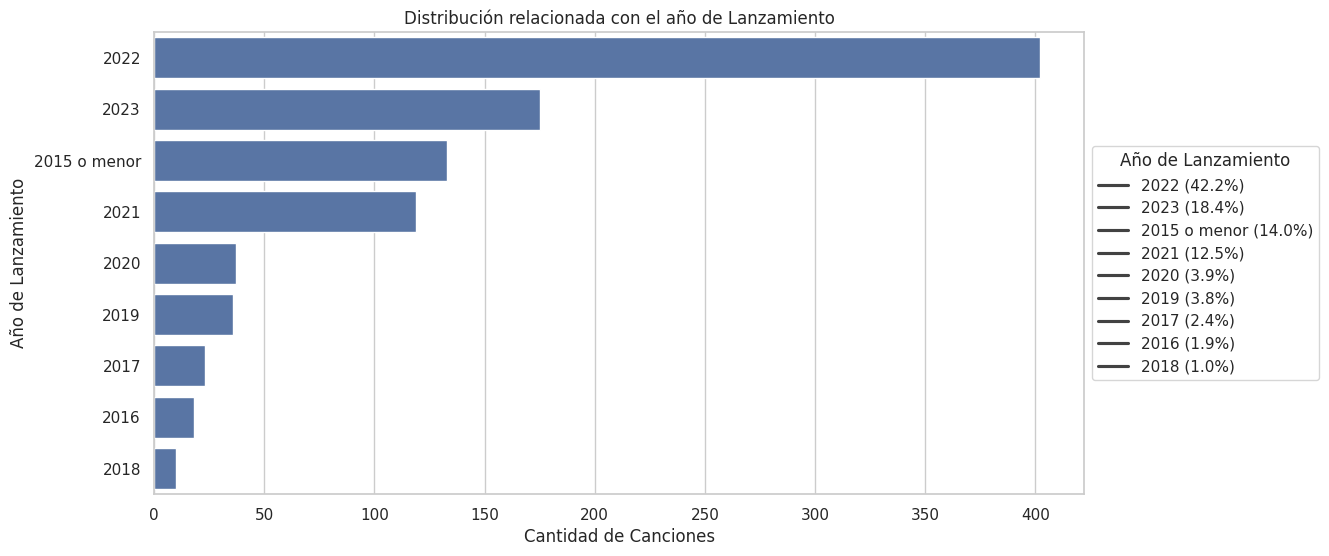

In [ ]:
plt.figure(figsize=(12, 6))

sns.set(style="whitegrid")
sns.color_palette("pastel")
sns.barplot(x=values_grouped, y=labels_grouped)

plt.title('Distribución relacionada con el año de Lanzamiento')
plt.xlabel('Cantidad de Canciones')
plt.ylabel('Año de Lanzamiento')

plt.legend(labels=legend_labels, loc='center left', bbox_to_anchor=(1, 0.5), title='Año de Lanzamiento')

plt.show()

## 2. Relación entre la posición de una canción en Spotify y Deezer.

### Matplotlib
A continuación, vamos a utilizar una gráfica de dispersión, con esta vamos a validar la relación entre la posición de cada canción en las listas de Spotify comparada con la posición de la misma en las listas de Deezer y ver si hay alguna relación entre la popularidad de una canción en Spotify y su popularidad en Deezer, lo que podría ser útil para comprender el alcance y la distribución de la audiencia de una canción en diferentes plataformas de streaming de música.

plt.scatter crea un gráfico de dispersión.

data_sorted['in_spotify_playlists'] y data_sorted['in_deezer_playlists'] son la serie de datos que se utilizarán.

plt.yscale y plt.yticks serán utilizadas debido a que los datos que ofrece la columna in_deezer_playlists son muy variados y al mostrarlos en el eje x se ven desordenados, por eso usamos una escala logarítmica y definimos los valores de referencia a mostrar en el eje y

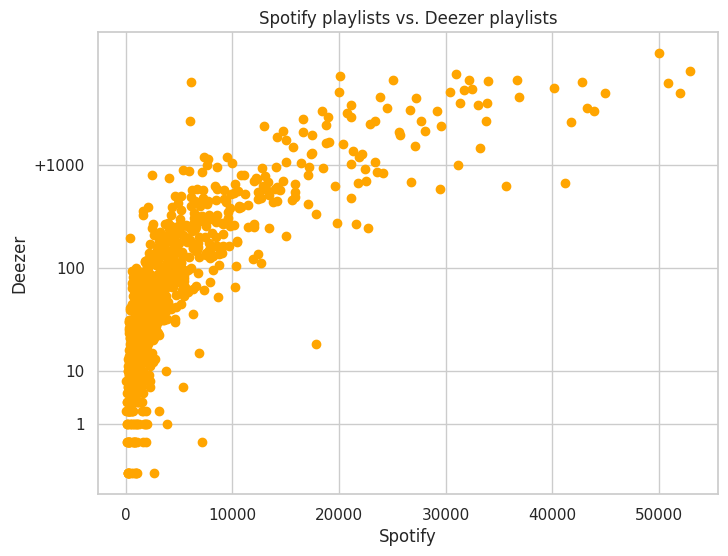

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(data_sorted['in_spotify_playlists'], data_sorted['in_deezer_playlists'], color='orange')
plt.title('Spotify playlists vs. Deezer playlists')
plt.xlabel('Spotify')
plt.ylabel('Deezer')
plt.yscale('log')
plt.yticks([3, 10, 100, 1000], ['1', '10', '100', '+1000'])
plt.show()


### Seaborn
Ahora haremos la gráfica con seaborn, en este caso vamos a hacer una gráfica de línea:

sns.lineplot contiene las mismas columnas que el gráfico anterior, usando data como el conjunto de datos completo y x e y como las columnas referencia.

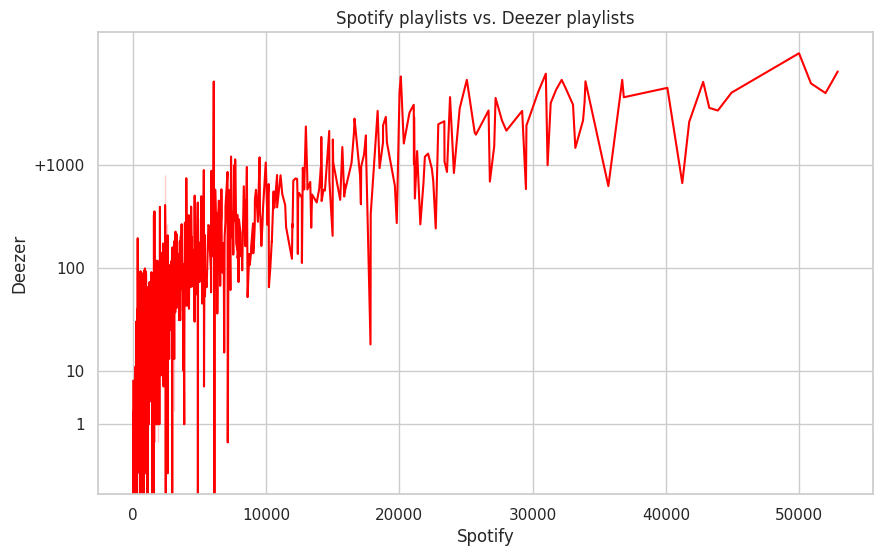

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='in_spotify_playlists', y='in_deezer_playlists', data=data_sorted, color='red')
plt.title('Spotify playlists vs. Deezer playlists')
plt.xlabel('Spotify')
plt.ylabel('Deezer')
plt.yscale('log')
plt.yticks([3, 10, 100, 1000], ['1', '10', '100', '+1000'])
plt.show()

## 3. Cantidad de canciones lanzadas por año en el top 10 de Deezer y Apple Music.

### Matplotlib
La siguiente gráfica de líneas busca encontrar cuantas canciones por año de lanzamiento han estado en el top 10 de cada plataforma en 2023: Apple music y Deezer:

data_sorted incluye solo las filas donde el valor en la columna 'in_apple_charts' y 'in_deezer_charts' sea menor o igual a 10.

groupby agrupa los datos filtrados por año de lanzamiento ('released_year') y luego cuentan cuántas canciones hay en cada grupo.

plt.plot() traza los datos obtenidos teniendo en cuenta loas años de lanzamiento (.index) y la cantidad de canciones (.values).



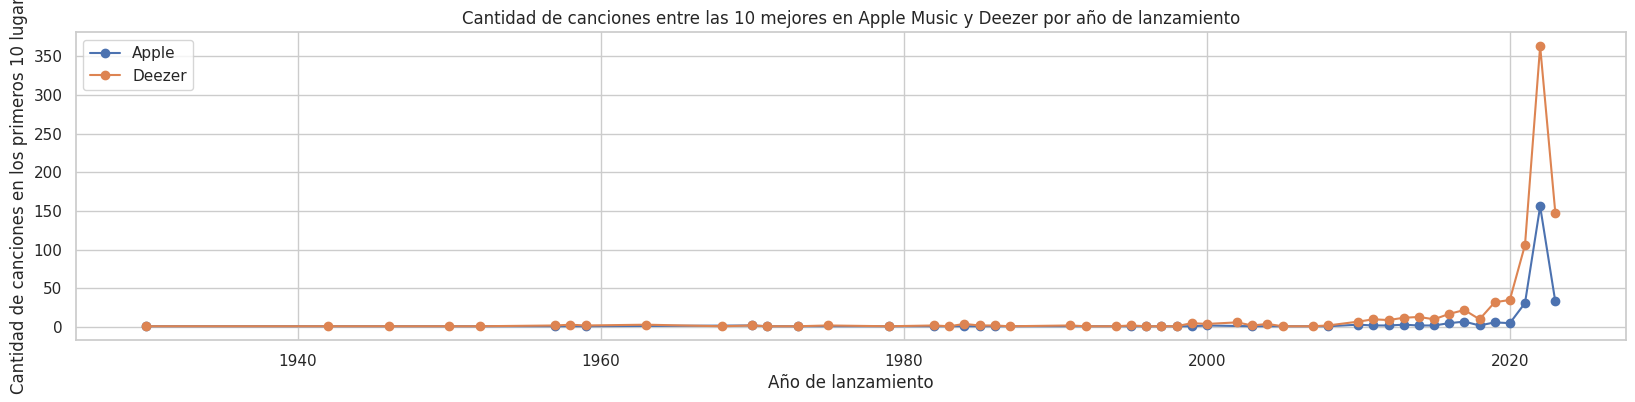

In [ ]:
top_10_apple = data_sorted[data_sorted['in_apple_charts'] <= 10]
top_10_deezer = data_sorted[data_sorted['in_deezer_charts'] <= 10]

count_top_10_apple = top_10_apple.groupby('released_year').size()
count_top_10_deezer = top_10_deezer.groupby('released_year').size()

plt.figure(figsize=(20, 4))
plt.plot(count_top_10_apple.index, count_top_10_apple.values, label='Apple', marker='o')
plt.plot(count_top_10_deezer.index, count_top_10_deezer.values, label='Deezer', marker='o')

plt.title('Cantidad de canciones entre las 10 mejores en Apple Music y Deezer por año de lanzamiento')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Cantidad de canciones en los primeros 10 lugares')

plt.legend()

plt.grid(True)
plt.show()

### Seaborn
Vamos a replicar los mismos datos en seaborn a través de un gráfico de área apilada:

.groupby('released_year').size().reset_index(name='count') agrupa y cuenta el tamaño de cada grupo, restablece el índice y renombrar la columna resultante como 'count'.

.merge(count_top_10_deezer, on='released_year', suffixes=('_apple', '_deezer')) combina los conteos de canciones en un solo DataFrame, la columna 'released_year' se utiliza como clave de combinación, y agregamos sufijos '_apple' y '_deezer' a las columnas correspondientes para diferenciarlas.

sns.lineplot() traza un gráfico de líneas dependiendo si es deezer o apple.

.fill_between rellena el área bajo las líneas.

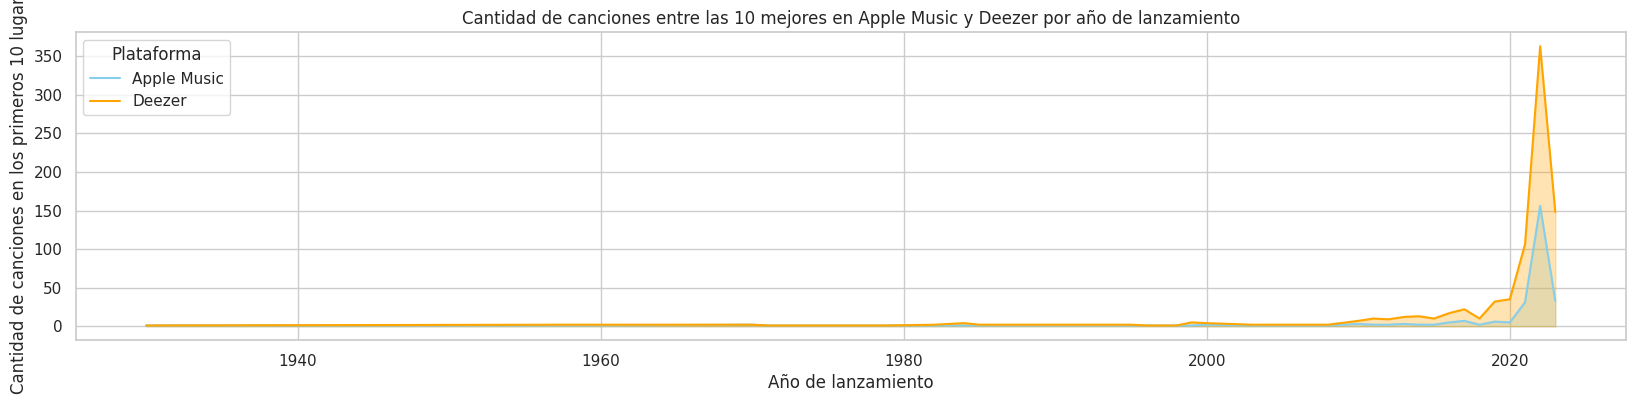

In [ ]:
count_top_10_apple = top_10_apple.groupby('released_year').size().reset_index(name='count')
count_top_10_deezer = top_10_deezer.groupby('released_year').size().reset_index(name='count')
top_10_counts = count_top_10_apple.merge(count_top_10_deezer, on='released_year', suffixes=('_apple', '_deezer'))

plt.figure(figsize=(20, 4))
sns.lineplot(data=top_10_counts, x='released_year', y='count_apple', color='skyblue', label='Apple Music')
sns.lineplot(data=top_10_counts, x='released_year', y='count_deezer', color='orange', label='Deezer')
plt.fill_between(top_10_counts['released_year'], top_10_counts['count_apple'], color='skyblue', alpha=0.3)
plt.fill_between(top_10_counts['released_year'], top_10_counts['count_deezer'], color='orange', alpha=0.3)
plt.title('Cantidad de canciones entre las 10 mejores en Apple Music y Deezer por año de lanzamiento')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Cantidad de canciones en los primeros 10 lugares')
plt.legend(title='Plataforma')
plt.grid(True)
plt.show()

## 4. Top 10 de artistas con mayor número de caciones.

### Matplotlib
A continuación, generaremos un cuadro de barras que muestre el top 10 de artistas con mayor número de caciones en el listado:

songs_per_artist obtiene un conteo de artistas en la columna correspondiente, teniendo en cuenta que si hay más de un artista por fila, los va a separar y contar por separado, eliminando cualquier espacio que haya luego de las comas separadoras.

head() obtiene los primero valores almacenados en la lista, en este caso serán 10 valores.

.plot(kind='bar') crea un gráfico de barras.

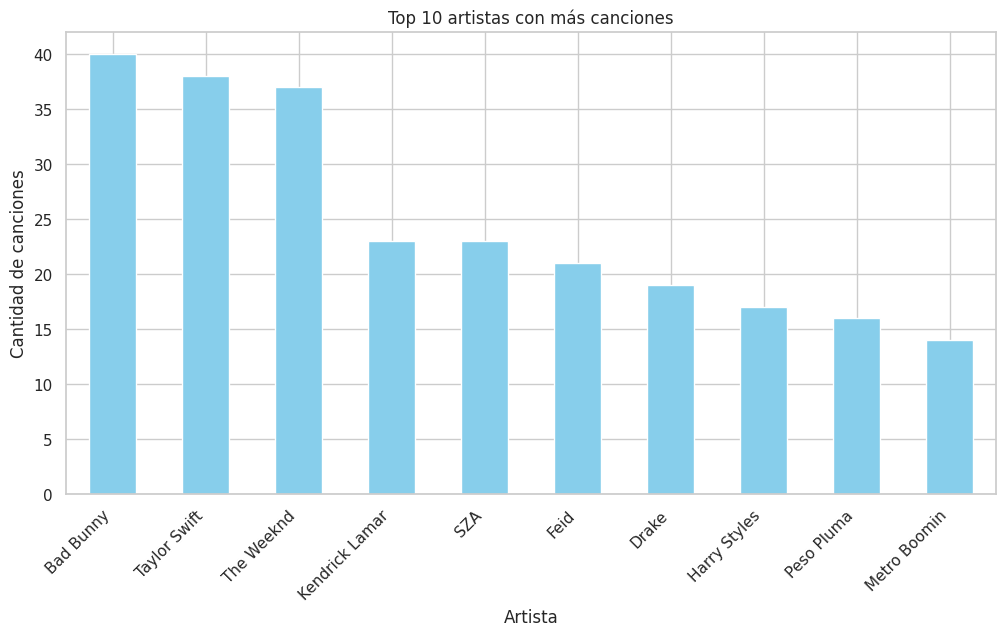

In [ ]:
songs_per_artist = data_sorted['artist(s)_name'].str.split(',').explode().str.strip().value_counts()

top_10_artists = songs_per_artist.head(10)

plt.figure(figsize=(12, 6))
top_10_artists.plot(kind='bar', color='skyblue')

plt.title('Top 10 artistas con más canciones')
plt.xlabel('Artista')
plt.ylabel('Cantidad de canciones')

plt.xticks(rotation=45, ha='right')
plt.show()

### Seaborn
Ahora replicamos el mismo ejemplo con un gráfico de barras en seaborn:

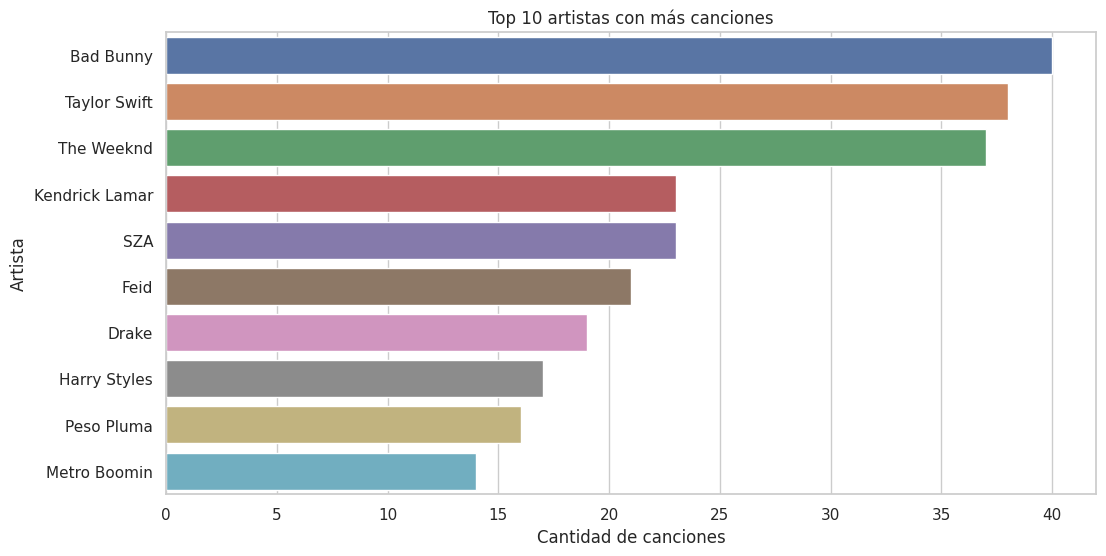

In [ ]:
top_10_artists_df = pd.DataFrame({'Artista': top_10_artists.index, 'Cantidad de canciones': top_10_artists.values})

plt.figure(figsize=(12, 6))
sns.barplot(x='Cantidad de canciones', y='Artista', data=top_10_artists_df, hue='Artista', dodge=False, legend=False)

plt.title('Top 10 artistas con más canciones')
plt.xlabel('Cantidad de canciones')
plt.ylabel('Artista')

plt.show()

## 5. Total de canciones por mes.

### Matplotlib
Por último utilizaremos un histograma que nos muestre la cantidad de canciones liberadas por mes, sin importar el año:

Como el dataset muestra los meses por día, importaremos la libreria calendar para obtener el nombre del mes.

.hist() creará el histograma usando los valores almacenados en la columna.

month_names obtendrá los nombres de los meses según el valor de cada fila.

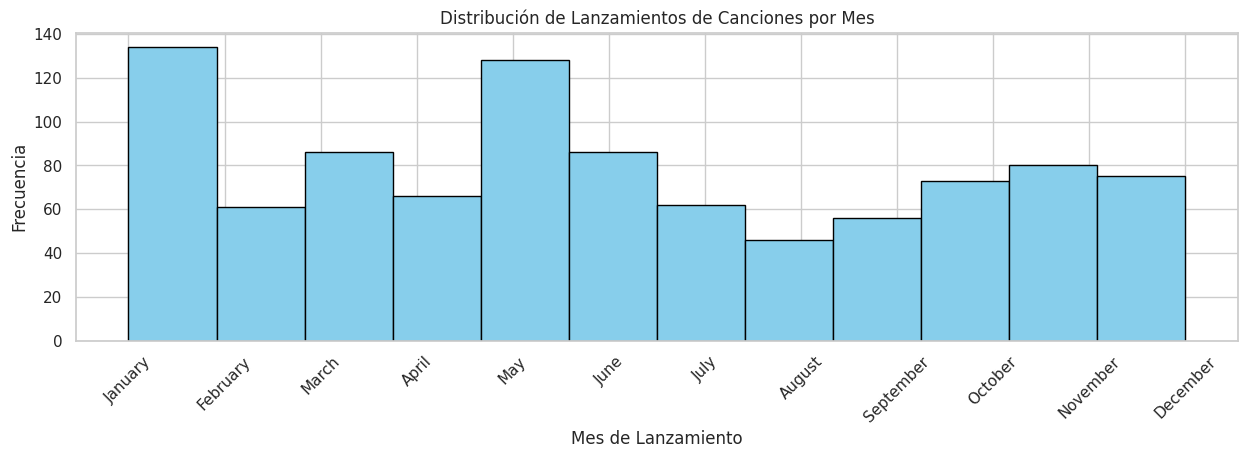

In [ ]:
import calendar

plt.figure(figsize=(15, 4))

plt.hist(data_sorted['released_month'], bins=12, color='skyblue', edgecolor='black')
month_names = [calendar.month_name[i] for i in range(1, 13)]

plt.xticks(range(1, 13), month_names, rotation=45)
plt.title('Distribución de Lanzamientos de Canciones por Mes')
plt.xlabel('Mes de Lanzamiento')
plt.ylabel('Frecuencia')

plt.show()

### Seaborn
Ahora vamos a usar seaborn para representar los datos en un gráfico de líneas:

data_sorted['released_month'].value_counts().sort_index() cuenta la cantidad de apariciones por mes y luego lineplot() los grafica.

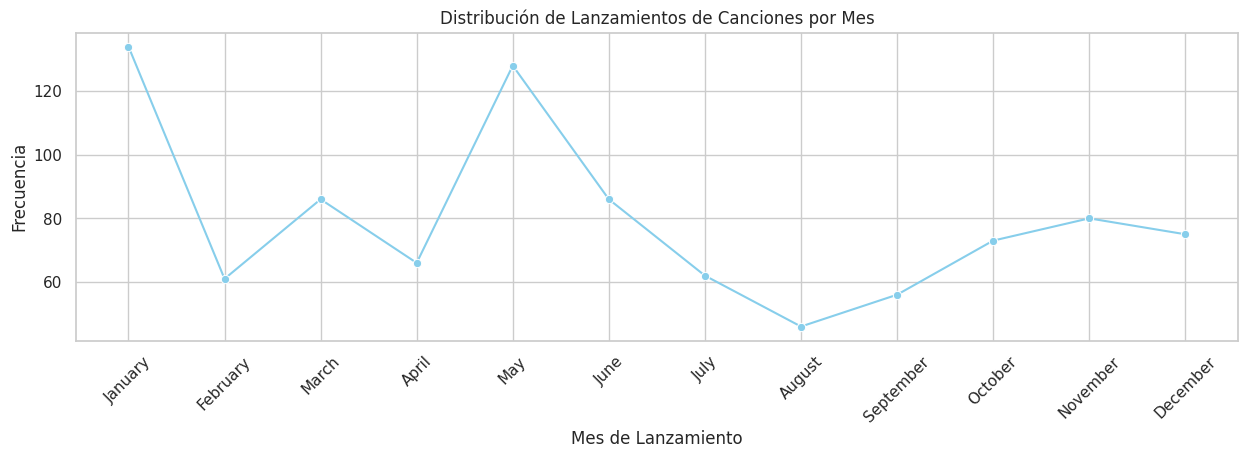

In [ ]:
plt.figure(figsize=(15, 4))

sns.lineplot(x=range(1, 13), y=data_sorted['released_month'].value_counts().sort_index(), color='skyblue', marker='o')

month_names = [calendar.month_name[i] for i in range(1, 13)]

plt.xticks(range(1, 13), month_names, rotation=45)
plt.title('Distribución de Lanzamientos de Canciones por Mes')
plt.xlabel('Mes de Lanzamiento')
plt.ylabel('Frecuencia')

plt.show()

<sub>Juan Camilo Bocanegra Osorio, 2024, Corporación Universitaria Iberoamericana</sub>